In [ ]:
!pip install easyocr
!pip install imutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 18.8 MB/s eta 0:00:00


In [ ]:
!pip install easyocr
!pip install imutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 14.5 MB/s eta 0:00:00


In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr


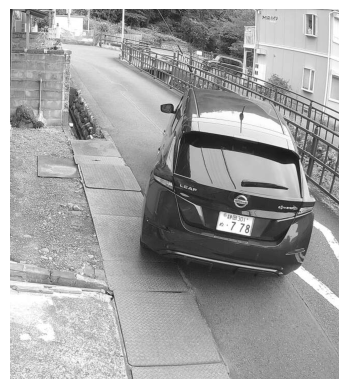

In [ ]:
# Load your image
img = cv2.imread('/content/sample_data/1.jpg')

# Resize the image to 1280x720
img = cv2.resize(img, (1280, 720))

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define the right and left regions of interest
right_roi = gray[:, 640:]  # Right side of the image
left_loi = gray[:, :640]   # Left side of the image

# Display the right ROI
plt.imshow(right_roi, cmap='gray')
plt.axis('off')
plt.show()

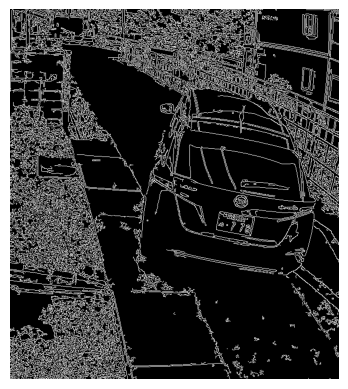

In [ ]:
# Noise reduction using bilateral filter for right ROI
bfilter_right = cv2.bilateralFilter(right_roi, 11, 17, 17)

# Edge detection using Canny for right ROI
edged_right = cv2.Canny(bfilter_right, 30, 200)

# Display the edged right ROI
plt.imshow(edged_right, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Find contours for right ROI
keypoints_right = cv2.findContours(edged_right.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_right = imutils.grab_contours(keypoints_right)
contours_right = sorted(contours_right, key=cv2.contourArea, reverse=True)[:10]


In [ ]:
# Create a mask for the right ROI
mask_right = np.zeros(right_roi.shape, dtype=np.uint8)

# Draw contours on the mask for right ROI
cv2.drawContours(mask_right, contours_right, -1, 255, thickness=cv2.FILLED)

# Apply the mask to the right ROI
masked_right_roi = cv2.bitwise_and(right_roi, right_roi, mask=mask_right)

# Find contours on the masked right ROI
contours_plate = cv2.findContours(masked_right_roi.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_plate = imutils.grab_contours(contours_plate)


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

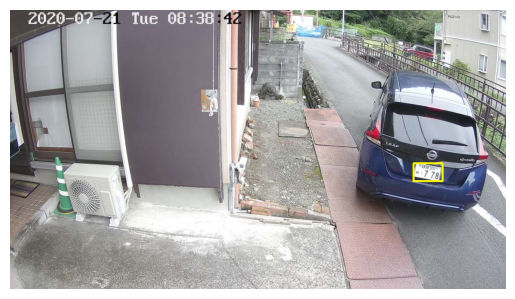

Total number of yellow number plates: 0


In [ ]:
# Initialize a counter for yellow number plates
yellow_plate_count = 0

# Iterate through the detected contours and process each one
for contour in contours_plate:
    # Calculate the approximate polygon of the contour
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Check if the polygon has 4 corners (assuming it's a potential number plate)
    if len(approx) == 4:
        # Draw a bounding box around the detected number plate
        x, y, w, h = cv2.boundingRect(approx)
        cv2.rectangle(img, (x + 640, y), (x + 640 + w, y + h), (0, 255, 255), 3)

        # Use EasyOCR to read text in the number plate
        plate_roi = right_roi[y:y + h, x:x + w]
        reader = easyocr.Reader(['en'])
        result = reader.readtext(plate_roi)

        # Check if the detected text is yellow (you may need to adjust the color range)
        if result:
            text = result[0][-2].lower()
            if 'yellow' in text:
                yellow_plate_count += 1

# Display the image with bounding boxes
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Output the total number of yellow number plates
print(f"Total number of yellow number plates: {yellow_plate_count}")

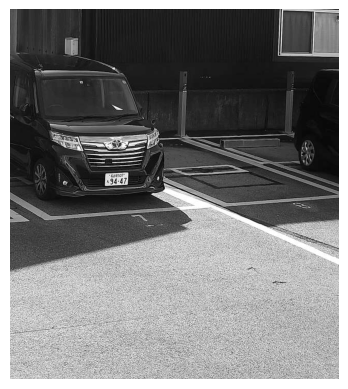

In [ ]:
# Load your image
img = cv2.imread('/content/sample_data/20.jpg')

# Resize the image to 1280x720
img = cv2.resize(img, (1280, 720))

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define the right and left regions of interest
right_roi = gray[:, 640:]  # Right side of the image
left_loi = gray[:, :640]   # Left side of the image

# Display the right ROI
plt.imshow(right_roi, cmap='gray')
plt.axis('off')
plt.show()

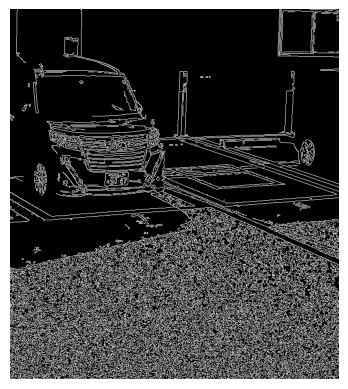

In [ ]:
# Noise reduction using bilateral filter for right ROI
bfilter_right = cv2.bilateralFilter(right_roi, 11, 17, 17)

# Edge detection using Canny for right ROI
edged_right = cv2.Canny(bfilter_right, 30, 200)

# Display the edged right ROI
plt.imshow(edged_right, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Find contours for right ROI
keypoints_right = cv2.findContours(edged_right.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_right = imutils.grab_contours(keypoints_right)
contours_right = sorted(contours_right, key=cv2.contourArea, reverse=True)[:10]



In [ ]:
# Create a mask for the right ROI
mask_right = np.zeros(right_roi.shape, dtype=np.uint8)

# Draw contours on the mask for right ROI
cv2.drawContours(mask_right, contours_right, -1, 255, thickness=cv2.FILLED)

# Apply the mask to the right ROI
masked_right_roi = cv2.bitwise_and(right_roi, right_roi, mask=mask_right)

# Find contours on the masked right ROI
contours_plate = cv2.findContours(masked_right_roi.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_plate = imutils.grab_contours(contours_plate)

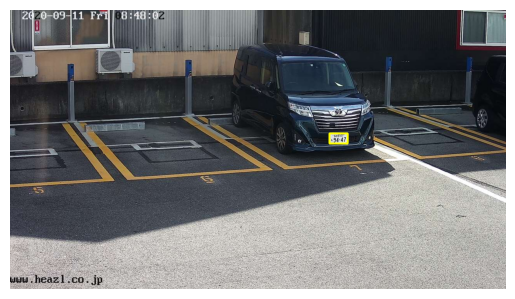

Total number of yellow number plates: 0


In [ ]:
# Initialize a counter for yellow number plates
yellow_plate_count = 0

# Iterate through the detected contours and process each one
for contour in contours_plate:
    # Calculate the approximate polygon of the contour
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Check if the polygon has 4 corners (assuming it's a potential number plate)
    if len(approx) == 4:
        # Draw a bounding box around the detected number plate
        x, y, w, h = cv2.boundingRect(approx)
        cv2.rectangle(img, (x + 640, y), (x + 640 + w, y + h), (0, 255, 255), 3)

        # Use EasyOCR to read text in the number plate
        plate_roi = right_roi[y:y + h, x:x + w]
        reader = easyocr.Reader(['en'])
        result = reader.readtext(plate_roi)

        # Check if the detected text is yellow (you may need to adjust the color range)
        if result:
            text = result[0][-2].lower()
            if 'yellow' in text:
                yellow_plate_count += 1

# Display the image with bounding boxes
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Output the total number of yellow number plates
print(f"Total number of yellow number plates: {yellow_plate_count}")
